# 1-Import Data

In [1]:
# import numpy as np
# import pandas as pd
# from ipywidgets import GridBox, Layout

import fileselector as fs
from importlib import reload
reload(fs)
fs.load_dependencies()
# Usage
# Replace '/your/start/directory/' with your actual start directory
Path='/home/coder/project/doric_fiberphotometry/Data/knob'

file_selector = fs.FileSelector(Path)
# file_name = file_selector.get_selected_file()


Dropdown(description='Select File:', options=('Select a file', '258_NAc_knob_Apr18_0000_144628942_incomplete.d…

Selected file: /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr26_0000_140350753_incomplete.doric
loading dataset .....


GridBox(children=(Dropdown(description='Isos:', index=7, layout=Layout(height='100px', width='100%'), options=…

Button(description='Load Data', layout=Layout(display='none'), style=ButtonStyle())

Not all datasets were automatically selected, please review and select manually.
Datasets loaded.


ipympl is installed. You can proceed with %matplotlib ipympl.
Figure saved as /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr26_0000_140350753_incomplete/Figs//raw_data_seperated.png


/home/coder/project/doric_fiberphotometry/dataexplorer.py:390: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/coder/project/doric_fiberphotometry/dataexplorer.py:402: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(save_path_input.value, dpi=300, bbox_inches='tight')


Figure saved as /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr26_0000_140350753_incomplete/Figs//raw_data_merged.png


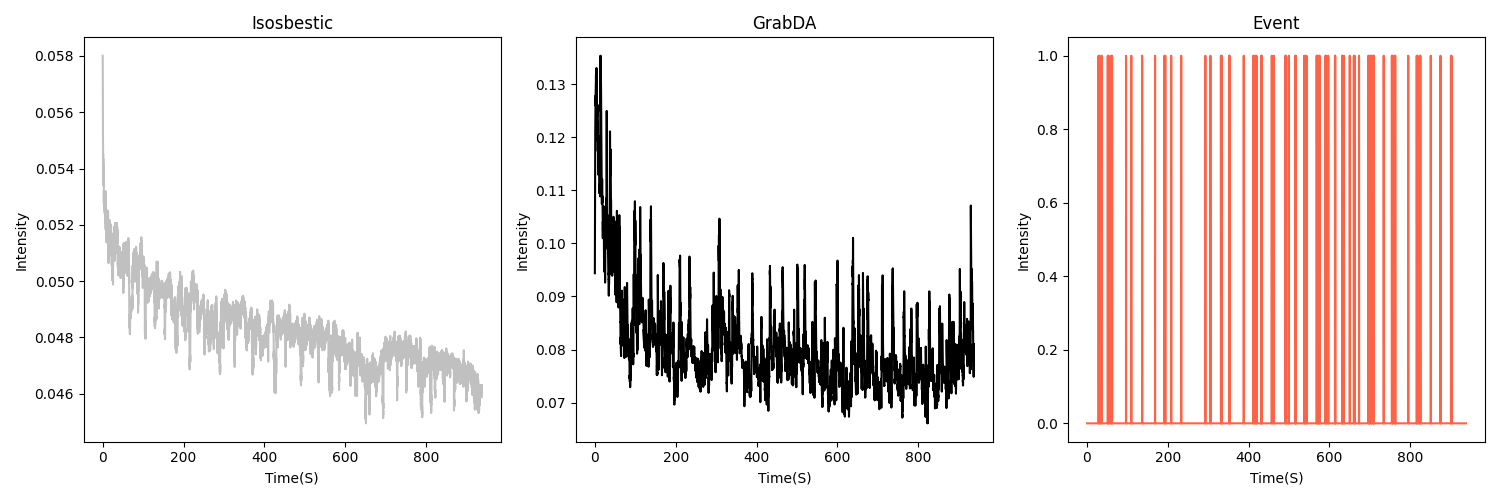

/usr/local/lib/python3.9/dist-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


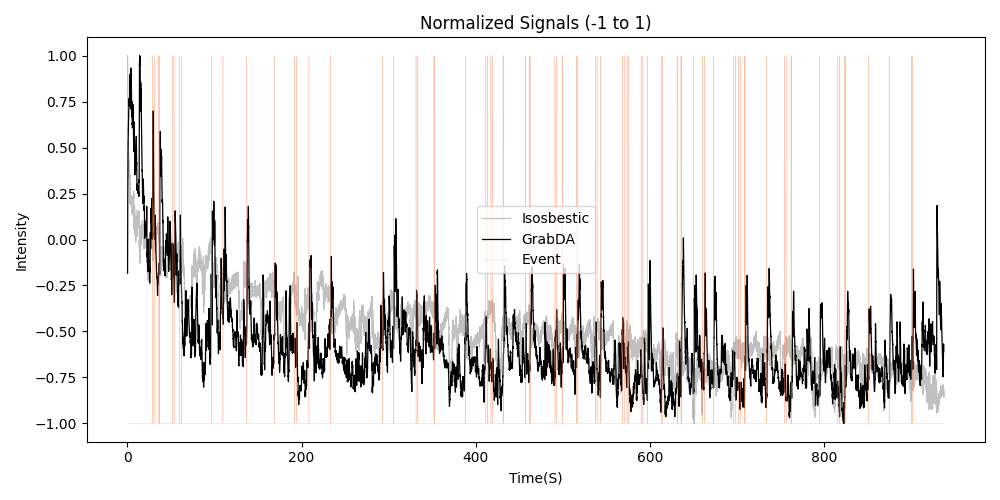

/usr/local/lib/python3.9/dist-packages/ipympl/backend_nbagg.py:279: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.manager.handle_json(content)


In [2]:
## After selecting datasets, the respective info will be displayed.
## Then, click "Load Data" button to load the datasets.
isos_df = file_selector.get_isos_df()
grabda_df = file_selector.get_grabda_df()
event_df = file_selector.get_event_df()

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

import dataexplorer as de
from importlib import reload
try:
    import ipympl
    print("ipympl is installed. You can proceed with %matplotlib ipympl.")
    %matplotlib widget
except ImportError:
    print("ipympl is not installed. Please run !pip install ipympl.")
    %pip install ipympl
    %matplotlib widget


reload(de)

de.plot_and_save_seperated(isos_df, grabda_df, event_df,file_selector)

de.plot_and_save(isos_df,grabda_df,event_df,file_selector)



# Knob Events


In [3]:
import dataexplorer as de
from importlib import reload
import ipywidgets as widgets
from IPython.display import display
reload(de)

rising_edges = event_df['Data'].diff() == 1
rising_edge_df = event_df[rising_edges].reset_index().rename(columns={'index': 'Sample_Number'})
## Calculate the optimal time window
optimal_window = de.find_optimal_time_window(rising_edge_df,Event_type='Knob')
print("optimal window is :",optimal_window)
## Classify events in the rising_edge_df
# classified_events_df = de.classify_events(rising_edge_df,optimal_window,['Init','Success','Fail'])
classified_events_df = de.classify_events(rising_edge_df,optimal_window,Event_type='knob')

print(classified_events_df.head())
print("Event Number: ",len(classified_events_df))


optimal window is : 0.033
      Time     Type  Sample_Number
0  28.6227     Init       286227.0
1  30.6446     Fail       306446.0
2  36.1212     Init       361212.0
3  36.3096  Success       363096.0
4  51.4110     Init       514110.0
Event Number:  96


In [ ]:
classified_events_df.head(12)

# Data Prepration


##  Use function get_zdFF to calculate z-dF/F

Download photometry_functions.py file from [here](https://github.com/katemartian/Photometry_data_processing "source").

please cite Jove paper:

__Martianova, E., Aronson, S., Proulx, C.D.__ [Multi-Fiber Photometry to Record Neural Activity in Freely Moving Animal.](https://www.jove.com/video/60278/multi-fiber-photometry-to-record-neural-activity-freely-moving). _J. Vis. Exp._ (152), e60278, doi:10.3791/60278 (2019).

[refrence](https://colab.research.google.com/github/katemartian/Photometry_data_processing/blob/master/Photometry_data_processing.ipynb#scrollTo=Lak9o-Hn3QQW)


In [4]:
from importlib import reload
import photometry_functions as pf
reload(pf)
# Usage
def save_signal(zdff):
    global signal_df 
    signal_df = zdff
    
    print(signal_df.head())
analysis = pf.PhotometryAnalysis(isos_df,grabda_df,save_signal)



IntText(value=10, description='Cutoff Freq:')

IntText(value=0, description='remove(ms):')

FloatLogSlider(value=500000000000.0, description='lambd:', max=16.0, min=5.0)

IntText(value=10, description='porder:')

IntText(value=50, description='itermax:')

Button(description='Run Function', style=ButtonStyle())

Output()

# PSTH Prepration

## Cut and Center the Data

In [5]:
import photometry_functions as pf
from importlib import reload

reload(pf)

# Example usage:
time_window = (-5, 10)  # For example, 2 seconds before and after the event
event_type = "Init"  # Use "All" to process all events, or specify a particular type like 'Init'
centralized_signals_df_Init = pf.cut_and_center_signals_modified(signal_df, classified_events_df, time_window, event_type)
print(centralized_signals_df_Init.head())

event_type = "Success"  # Use "All" to process all events, or specify a particular type like 'Init'
centralized_signals_df_Success = pf.cut_and_center_signals_modified(signal_df, classified_events_df, time_window, event_type)
print(centralized_signals_df_Success.head())

event_type = "Fail"  # Use "All" to process all events, or specify a particular type like 'Init'
centralized_signals_df_Fail = pf.cut_and_center_signals_modified(signal_df, classified_events_df, time_window, event_type)
print(centralized_signals_df_Fail.head())


            Time      Data
Event Row                 
1     2352 -5.00 -0.688759
      2353 -4.99 -0.666174
      2354 -4.98 -0.648053
      2355 -4.97 -0.635530
      2356 -4.96 -0.627236
            Time      Data
Event Row                 
1     3102 -5.00  0.204471
      3103 -4.99  0.197415
      3104 -4.98  0.190114
      3105 -4.97  0.180296
      3106 -4.96  0.169724
            Time      Data
Event Row                 
1     2352 -5.00 -0.688759
      2353 -4.99 -0.666174
      2354 -4.98 -0.648053
      2355 -4.97 -0.635530
      2356 -4.96 -0.627236


## cut signal around Init

In [6]:
# Example usage:
time_window = (-4, 10)  # For example, 2 seconds before and after the event
event_type = "Init"  # Use "All" to process all events, or specify a particular type like 'Init'
centralized_signals_df_Init = pf.cut_and_center_signals(signal_df, classified_events_df, time_window, event_type)
print(centralized_signals_df_Init.head())

event_type = "Success"  # Use "All" to process all events, or specify a particular type like 'Init'
centralized_signals_df_Success = pf.cut_and_center_signals(signal_df, classified_events_df, time_window, event_type)
print(centralized_signals_df_Success.head())

event_type = "Fail"  # Use "All" to process all events, or specify a particular type like 'Init'
centralized_signals_df_Fail = pf.cut_and_center_signals(signal_df, classified_events_df, time_window, event_type)
print(centralized_signals_df_Fail.head())


            Time      Data
Event Row                 
1     2452 -4.00 -1.023882
      2453 -3.99 -1.017441
      2454 -3.98 -1.011453
      2455 -3.97 -1.009029
      2456 -3.96 -1.010058
            Time      Data
Event Row                 
1     3221 -4.00  0.272310
      3222 -3.99  0.265264
      3223 -3.98  0.253172
      3224 -3.97  0.237386
      3225 -3.96  0.219642
            Time      Data
Event Row                 
1     2654 -4.00 -0.332397
      2655 -3.99 -0.323755
      2656 -3.98 -0.315186
      2657 -3.97 -0.309588
      2658 -3.96 -0.305864


## Plot Dataset

### Plot all Signals 

In [ ]:
import os
# Plot All signals
y_min = -2
y_max = 4

import photometry_functions as pf
from importlib import reload
reload(pf)





# Init:
fig = plt
pf.plot_cut_signals(centralized_signals_df_Init,y_min,y_max)
# plot_cut_signals(filtered_signal_df)
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/all_Inits.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

# Success:
fig = plt
pf.plot_cut_signals(centralized_signals_df_Success,y_min,y_max)
# plot_cut_signals(filtered_signal_df)
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/all_Success.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

# Fail:
fig = plt
pf.plot_cut_signals(centralized_signals_df_Fail,y_min,y_max)
# plot_cut_signals(filtered_signal_df)
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/all_Fails.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")



### Plot Signals seperatly

In [ ]:
y_max=5
y_min=-2

import photometry_functions as pf
from importlib import reload

reload(pf)

# Init
pf.plot_cut_signals_seperated(centralized_signals_df_Init,y_min,y_max)

fig = plt
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/Separeted_Init_Events.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

# Success
pf.plot_cut_signals_seperated(centralized_signals_df_Success,y_min,y_max)

fig = plt
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/Separeted_Success_Events.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

# Fail
pf.plot_cut_signals_seperated(centralized_signals_df_Fail,y_min,y_max)

fig = plt
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/Separeted_Fail_Events.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

### Plot and Select Signals for PSTH

In [7]:

import photometry_functions as pf
from importlib import reload
import os

reload(pf)

# Example usage:

def handle_filtered_data(df,event_type):
    # Handle the filtered DataFrame here, e.g., save it to a global variable or process it further
    if event_type == 'Init':    
        global filtered_signal_df_Init
        filtered_signal_df_Init = df
        print(filtered_signal_df_Init.head())
    
    if event_type == 'Fail':    
        global filtered_signal_df_Fail
        filtered_signal_df_Fail = df
        print(filtered_signal_df_Fail.head())
    
    if event_type == 'Success':    
        global filtered_signal_df_Success
        filtered_signal_df_Success = df
        print(filtered_signal_df_Success.head())
    
    
    fig = plt
    filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/Selected_Stim_Events_'+event_type+'.png'

    directory = os.path.dirname(filename)
    if not os.path.exists(directory):
        os.makedirs(directory)

    fig.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Figure saved as {filename}")



# Init:
explorer = pf.SignalExplorer(centralized_signals_df_Init,'Init', save_callback=handle_filtered_data)
# This will display the widgets and allow interaction

# Success:
explorer = pf.SignalExplorer(centralized_signals_df_Success,'Success', save_callback=handle_filtered_data)
# This will display the widgets and allow interaction

# Fail:
explorer = pf.SignalExplorer(centralized_signals_df_Fail,'Fail', save_callback=handle_filtered_data)
# This will display the widgets and allow interaction


GridspecLayout(children=(Checkbox(value=False, description='Select All', layout=Layout(grid_area='widget001'))…

Button(description='Apply Selection', style=ButtonStyle())

Output()

GridspecLayout(children=(Checkbox(value=False, description='Select All', layout=Layout(grid_area='widget001'))…

Button(description='Apply Selection', style=ButtonStyle())

Output()

GridspecLayout(children=(Checkbox(value=False, description='Select All', layout=Layout(grid_area='widget001'))…

Button(description='Apply Selection', style=ButtonStyle())

Output()

Filtered data is ready.
            Time      Data
Event Row                 
1     2452 -4.00 -1.023882
      2453 -3.99 -1.017441
      2454 -3.98 -1.011453
      2455 -3.97 -1.009029
      2456 -3.96 -1.010058
Figure saved as /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr26_0000_140350753_incomplete/Figs//Selected_Stim_Events_Init.png


Filtered data is ready.
            Time      Data
Event Row                 
1     3221 -4.00  0.272310
      3222 -3.99  0.265264
      3223 -3.98  0.253172
      3224 -3.97  0.237386
      3225 -3.96  0.219642
Figure saved as /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr26_0000_140350753_incomplete/Figs//Selected_Stim_Events_Success.png


Filtered data is ready.
            Time      Data
Event Row                 
1     2654 -4.00 -0.332397
      2655 -3.99 -0.323755
      2656 -3.98 -0.315186
      2657 -3.97 -0.309588
      2658 -3.96 -0.305864
Figure saved as /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr26_0000_140350753_incomplete/Figs//Selected_Stim_Events_Fail.png


Filtered data is ready.
            Time      Data
Event Row                 
2     4932 -4.00  1.294327
      4933 -3.99  1.278165
      4934 -3.98  1.264976
      4935 -3.97  1.251507
      4936 -3.96  1.234268
Figure saved as /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr26_0000_140350753_incomplete/Figs//Selected_Stim_Events_Fail.png


## Normalization

In [8]:
import photometry_functions as pf
from importlib import reload

reload(pf)


# Init:
# Assuming 'Data' is the column in filtered_signal_df that you want to normalize
# normalized_signal_df_Init = pf.normalize_signal(filtered_signal_df_Init, column='Data')
normalized_signal_df_Init = filtered_signal_df_Init

# Success:
# Assuming 'Data' is the column in filtered_signal_df that you want to normalize
# normalized_signal_df_Success = pf.normalize_signal(filtered_signal_df_Success, column='Data')
normalized_signal_df_Success = filtered_signal_df_Success

# Fail:
# Assuming 'Data' is the column in filtered_signal_df that you want to normalize
# normalized_signal_df_Fail = pf.normalize_signal(filtered_signal_df_Fail, column='Data')
normalized_signal_df_Fail = filtered_signal_df_Fail


# This will normalize between -1 and 1 (not recomended to run it will incrupt the AUC)

In [ ]:
import photometry_functions as pf
from importlib import reload

reload(pf)

# Init:
# Assuming 'Data' is the column in filtered_signal_df that you want to normalize
normalized_signal_df_Init2 = pf.normalize_signal2(normalized_signal_df_Init, column='Data')

# Success:
# Assuming 'Data' is the column in filtered_signal_df that you want to normalize
normalized_signal_df_Success2 = pf.normalize_signal2(normalized_signal_df_Success, column='Data')

# Fail:
# Assuming 'Data' is the column in filtered_signal_df that you want to normalize
normalized_signal_df_Fail2 = pf.normalize_signal2(normalized_signal_df_Fail, column='Data')




# Analyze Resaults

## PSTH 

/home/coder/project/doric_fiberphotometry/photometry_functions.py:307: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_signal_df['Time'] = filtered_signal_df['Time'].round(decimal_places)
/home/coder/project/doric_fiberphotometry/photometry_functions.py:331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_signal_df['Time'] = filtered_signal_df['Time'].round(decimal_places)


[-6. -4. -2.  0.  2.  4.  6.  8. 10. 12.]
[-6.   -4.   -2.    0.    0.56  2.    4.    6.    8.   10.   12.  ]


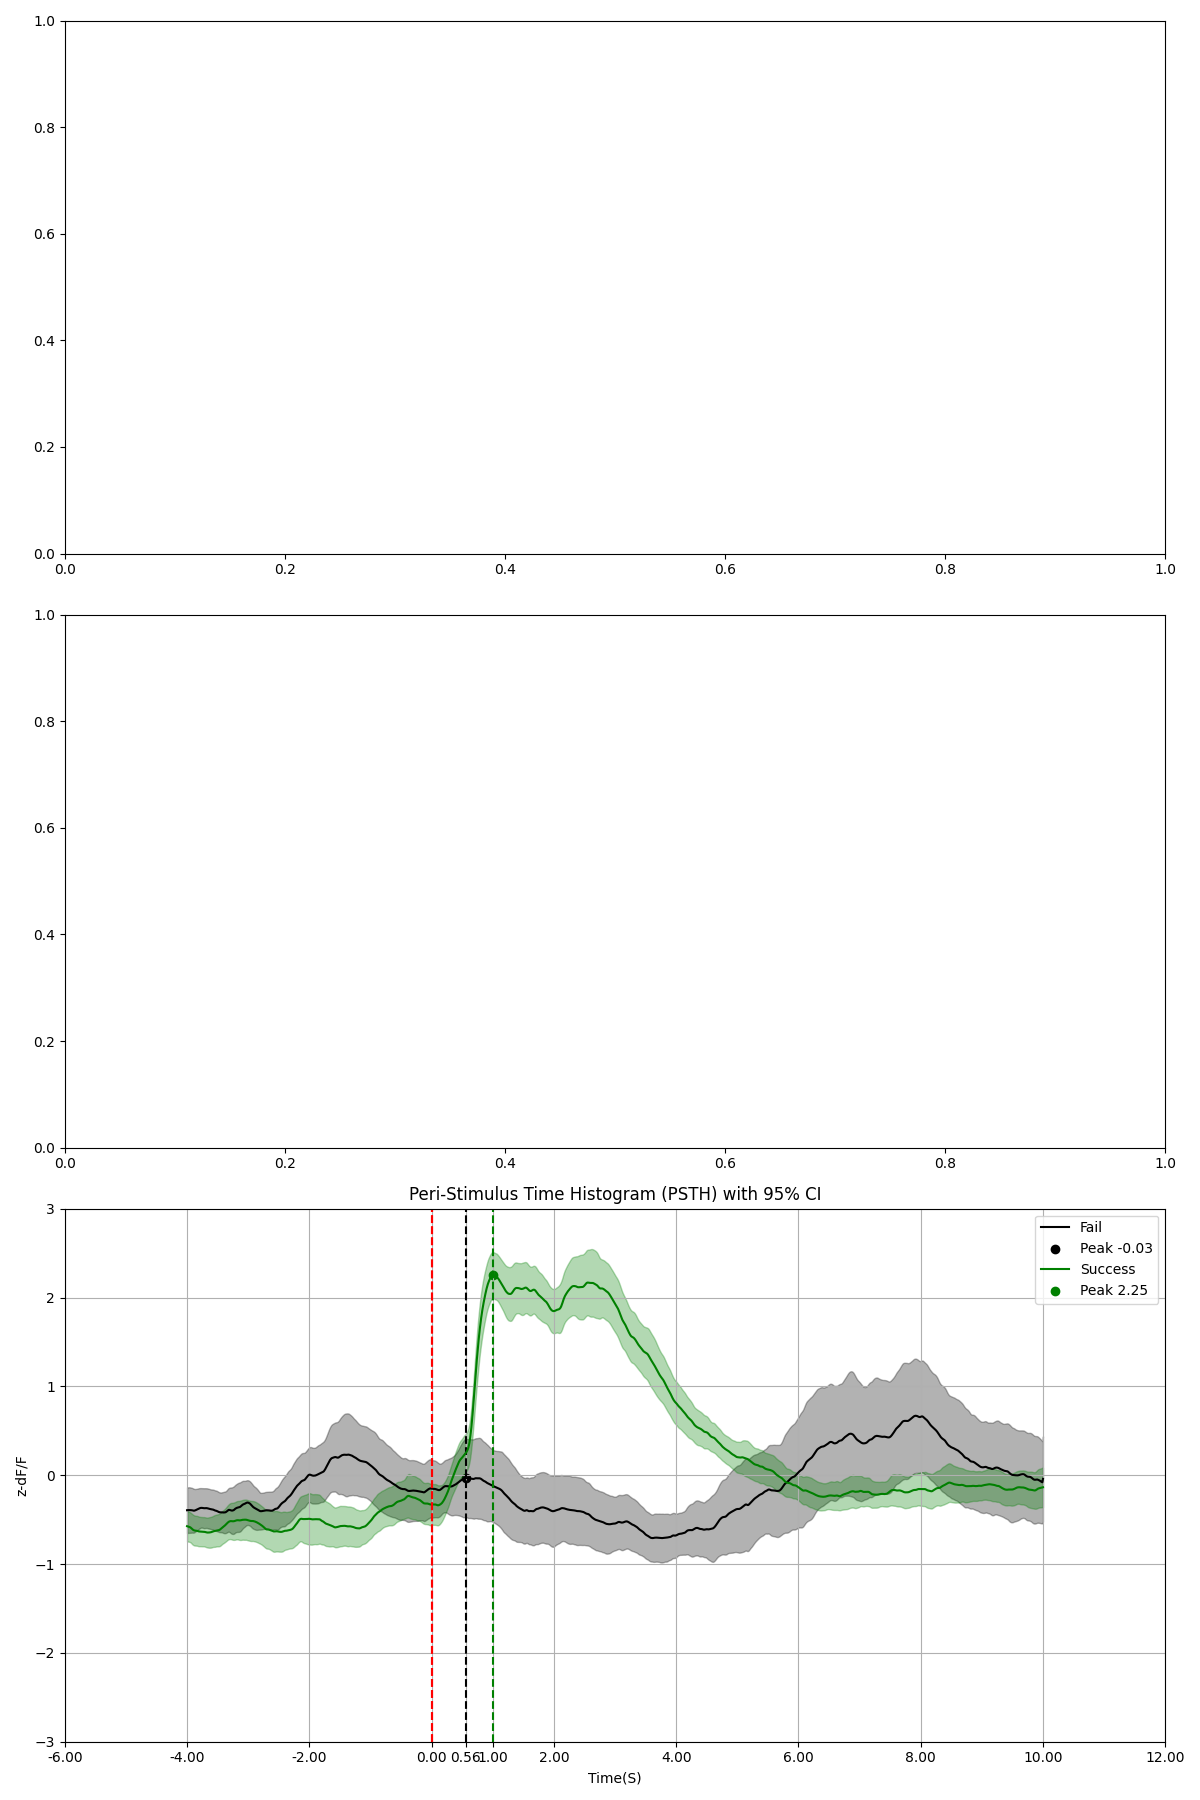

Figure saved as /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr26_0000_140350753_incomplete/Figs/PSTH.svg


In [9]:
import photometry_functions as pf
import os
from importlib import reload

reload(pf)


# PSTH_df_Fail=pf.create_psth_with_min_max(normalized_signal_df_Fail)
# PSTH_df_Success=pf.create_psth_with_min_max(normalized_signal_df_Success)

PSTH_df_std_Fail = pf.create_psth_with_std(normalized_signal_df_Fail)
PSTH_df_std_Success = pf.create_psth_with_std(normalized_signal_df_Success)

PSTH_df_ci_Fail = pf.create_psth_with_ci(normalized_signal_df_Fail)
PSTH_df_ci_Success = pf.create_psth_with_ci(normalized_signal_df_Success)

# Create a figure and a 3x1 grid of subplots
# fig, axs = plt.subplots(3, 1, figsize=(12, 18))
fig, axs = plt.subplots(3, 1, figsize=(12, 18))


# PSTH_df_Init=pf.create_psth_with_min_max(normalized_signal_df_Init)
# pf.plot_psth(PSTH_df_Init, -3, 3,'black','Init')
pf.plot_psth(PSTH_df_ci_Fail, -3, 3,'black','Fail',pos=axs[2])
pf.plot_psth(PSTH_df_ci_Success, -3, 3,'green','Success',pos=axs[2])


# pf.plot_psth(PSTH_df_std_Fail, -3, 3,'black','Fail',pos=axs[1])
# pf.plot_psth(PSTH_df_std_Success, -3, 3,'green','Success',pos=axs[1])
# plt.subplots(2,2,2)

# pf.plot_psth(PSTH_df_Fail, -3, 3,'black','Fail',pos=axs[0])
# pf.plot_psth(PSTH_df_Success, -3, 3,'green','Success',pos=axs[0])

plt.tight_layout()

plt.show()

filename = file_selector.file_path.split('.')[0]+'/Figs/'+'PSTH.svg'


directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, format='svg', dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")


## HeatMap

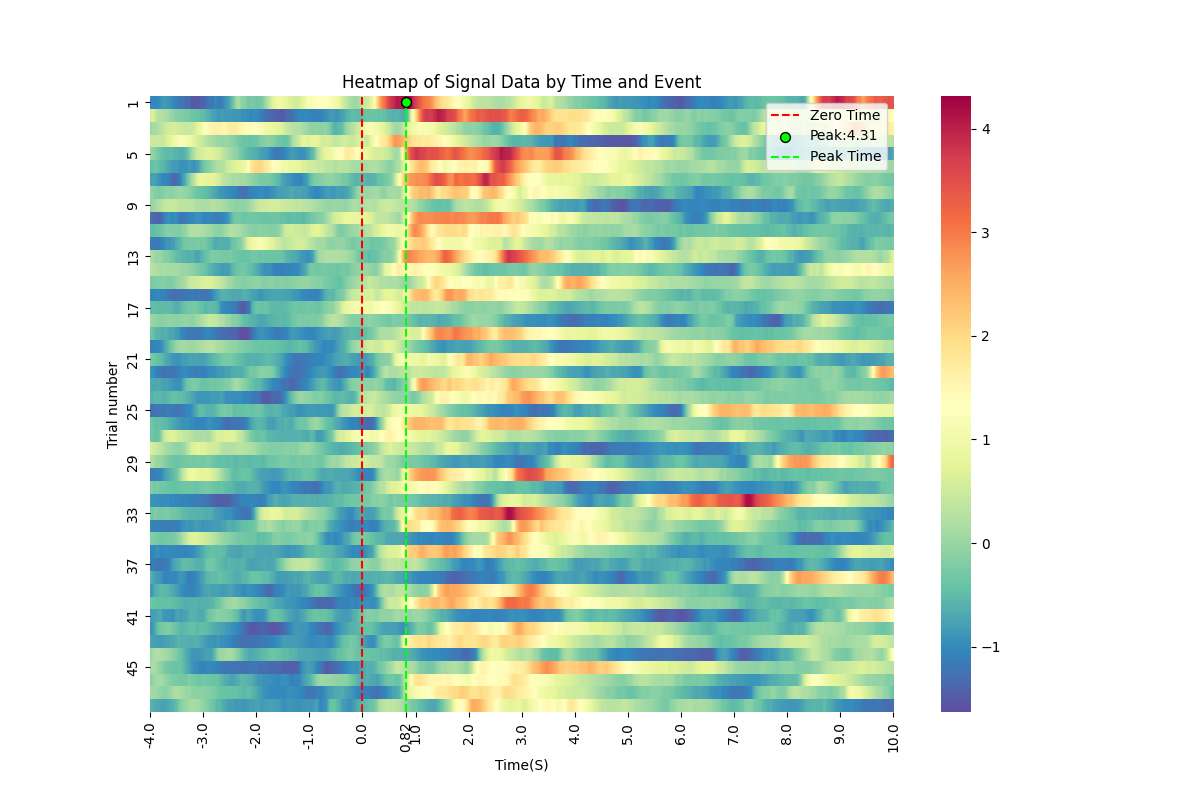

Figure saved as /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr26_0000_140350753_incomplete/Figs//Heatmap_init.svg


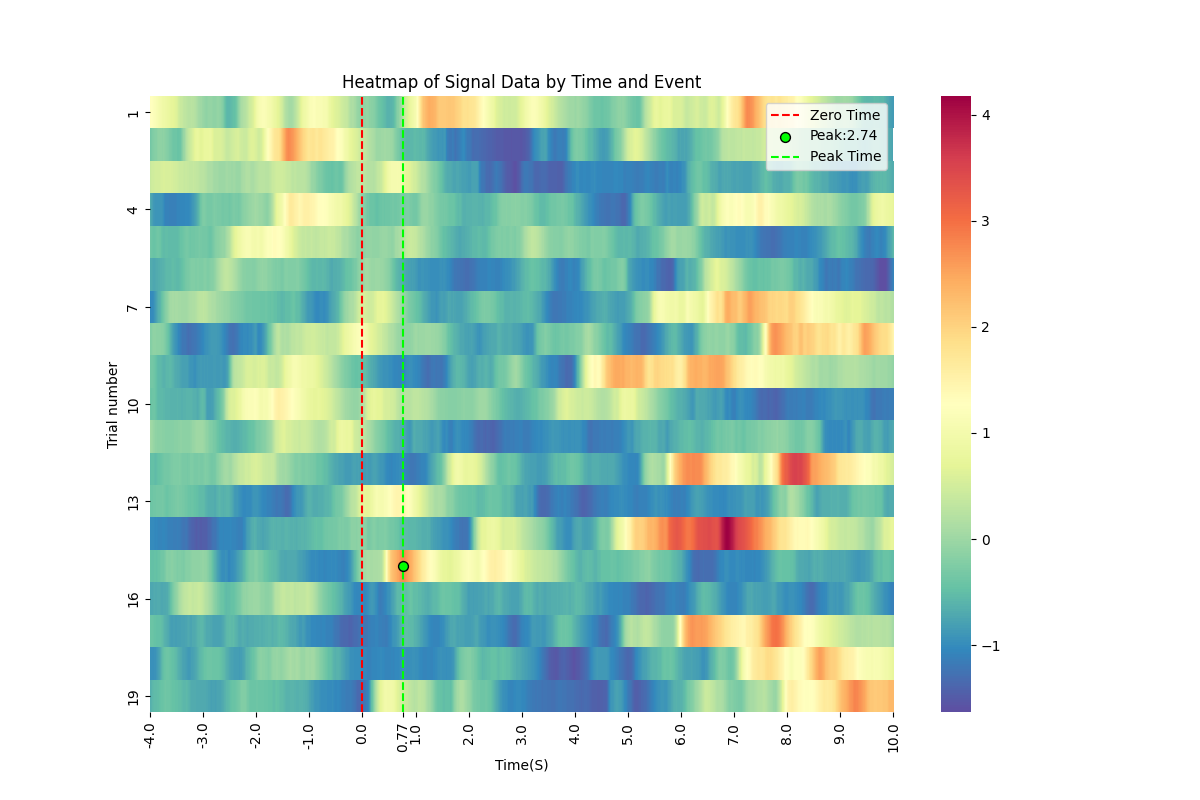

Figure saved as /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr26_0000_140350753_incomplete/Figs//Heatmap_Fail.svg


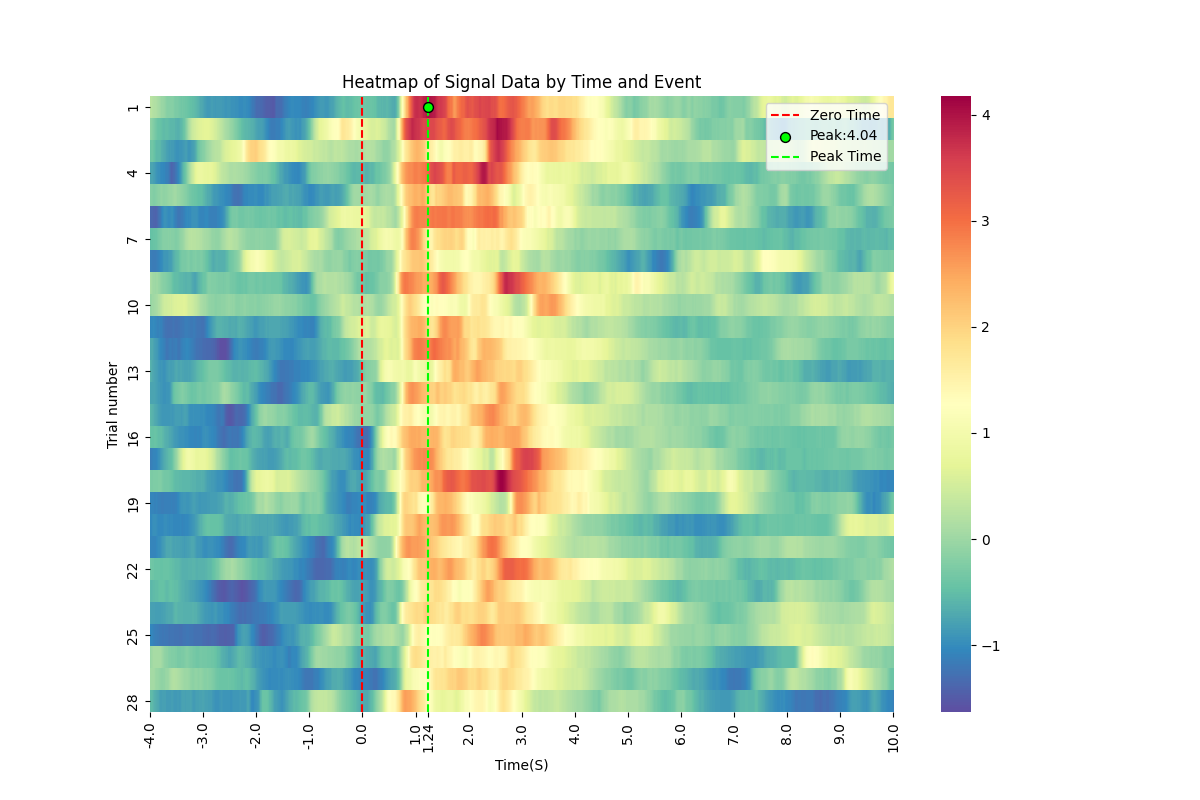

Figure saved as /home/coder/project/doric_fiberphotometry/Data/knob/258_NAc_knob_Apr26_0000_140350753_incomplete/Figs//Heatmap_Success.svg


In [10]:
import photometry_functions as pf
import os
from importlib import reload

reload(pf)

filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/Heatmap_init.svg'
directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)


pf.heatmap_plot(normalized_signal_df_Init)
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/Heatmap_Fail.svg'
pf.heatmap_plot(normalized_signal_df_Fail)
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/Heatmap_Success.svg'
pf.heatmap_plot(normalized_signal_df_Success)
plt.savefig(filename, format='svg', dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")


### Area Under Curves 

In [ ]:
import photometry_functions as pf
import fileselector as fs
import os
from importlib import reload
reload(fs)
reload(pf)
fs.load_dependencies()

# Success
plt.figure(figsize=(12, 6))

pf.plot_psth_auc(PSTH_df_std_Success,-2, 3.5,'green','Stim')
plt.show()
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'AUC_Success.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

pf.plot_auc_bars_with_duration(PSTH_df_std_Success,-1.5, 1.5,(-2,0),(0,5))
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'AUC_Bars_Success.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

# Fail
plt.figure(figsize=(12, 6))

pf.plot_psth_auc(PSTH_df_std_Fail,-2, 3.5,'green','Stim')
plt.show()
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'AUC_Fail.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

pf.plot_auc_bars_with_duration(PSTH_df_std_Fail,-1.5, 1.5,(-2,0),(0,5))
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'AUC_Bars_Fail.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")



# saving all the Dataframes as CSV

In [ ]:
import pandas as pd
import datetime

def save_dataframes_to_csv():
    # Fetch the current datetime to append to file names to avoid overwriting
    now = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = file_selector.file_path.split('.')[0]+'/Data/'+'test.csv"'
    directory = os.path.dirname(filename)
    if not os.path.exists(directory):
        os.makedirs(directory)
    # Loop through all global variables
    for var_name, value in list(globals().items()):
        # Check if the value is an instance of pd.DataFrame
        if isinstance(value, pd.DataFrame):
            # Construct filename with a timestamp to prevent overwriting
            file = f"{var_name}_{now}.csv"
            filename = file_selector.file_path.split('.')[0]+'/Data/'+file

            # Save the DataFrame to a CSV file
            value.to_csv(filename, index=False)
            print(f"Saved {filename}")


# Call the function to save all DataFrames
save_dataframes_to_csv()


# reloading saved data

In [ ]:
import pandas as pd

def load_dataframe_from_csv(file_path):
    """
    Loads a DataFrame from a CSV file.

    Parameters:
    file_path (str): The path to the CSV file to be loaded.

    Returns:
    pandas.DataFrame: The DataFrame containing the data from the CSV file.
    """
    # Loading the DataFrame from the specified CSV file
    df = pd.read_csv(file_path)
    
    return df

# Example usage:
# Replace 'your_file.csv' with the path to the CSV file you want to load

csv_file_path = 'your_file.csv'
df = load_dataframe_from_csv(csv_file_path)
# Optionally, you can display the first few rows of the loaded DataFrame


In [ ]:
centralized_signals_df_Init


In [ ]:
import pandas as pd
import datetime
# Assuming centralized_signals_df_Init is your DataFrame

# If 'Event' is part of a MultiIndex, reset the index
if isinstance(centralized_signals_df_Init.index, pd.MultiIndex):
    centralized_signals_df_Init.reset_index(inplace=True)

# Filter the DataFrame for the base data at Time 0
# base_df = centralized_signals_df_Init[centralized_signals_df_Init['Time'] == 0]
# Filter the dataframe for the time range first
base_df = centralized_signals_df_Init[(centralized_signals_df_Init['Time'] >= -4) & (centralized_signals_df_Init['Time'] <= -2)]



base_df = base_df.groupby('Event')['Data'].mean().reset_index()
base_df.rename(columns={'Data': 'F_Init'}, inplace=True)

# Filter the DataFrame for Time values between 0 and 2
filtered_df = centralized_signals_df_Init[(centralized_signals_df_Init['Time'] >= 0) & (centralized_signals_df_Init['Time'] <= 2)]

# Group by 'Event' and find the maximum 'Data' value in each group
max_df = filtered_df.groupby('Event')['Data'].max().reset_index()
max_df.rename(columns={'Data': 'F_Max'}, inplace=True)

# Merge the base data and MaxdFF
result_df = pd.merge(base_df, max_df, on='Event', how='left')

# Calculate the difference between 'Max Data' and 'Base'
result_df['dFF'] = result_df['F_Max'] - result_df['F_Init']

# Calculate Init_Speed and Av_Speed
# Define time intervals for Init_Speed and Av_Speed calculations
init_interval_df = centralized_signals_df_Init[(centralized_signals_df_Init['Time'] >= 0) & (centralized_signals_df_Init['Time'] <= 0.1)]
av_interval_df = filtered_df  # already filtered from 0 to 2

# Group by 'Event' and calculate min and max 'Data' for Init_Speed
init_speed_calc = init_interval_df.groupby('Event')['Data'].agg(['min', 'max'])
init_speed_calc['F_Init_Speed'] = (init_speed_calc['max'] - init_speed_calc['min']) / 0.1

# Group by 'Event' and calculate min and max 'Data' for Av_Speed
av_speed_calc = av_interval_df.groupby('Event')['Data'].agg(['min', 'max'])
av_speed_calc['F_Av_Speed'] = (av_speed_calc['max'] - av_speed_calc['min']) / 2

# Merge these calculations into the result_df
result_df = result_df.merge(init_speed_calc[['F_Init_Speed']], on='Event', how='left')
result_df = result_df.merge(av_speed_calc[['F_Av_Speed']], on='Event', how='left')

# Save to CSV
now = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
file = f"result_data_{now}.csv"
result_df.to_csv(file, index=False)
result_df.to_csv('result_data.csv', index=False)

# Print confirmation
print(f"The result has been saved to '{file}'.")


In [ ]:
import pandas as pd

# Simulating the creation of your initial DataFrame
data = {
    "Event": [1, 1, 1, 1, 1],
    "Row": [617, 618, 619, 620, 621],
    "Time": [-4.00, -3.99, -3.98, -3.97, -3.96],
    "Data": [0.330067, 0.341075, 0.356469, 0.363225, 0.341833]
}
centralized_signals_df_Init = pd.DataFrame(data)

# Define the time intervals
init_interval = (0, 0.1)
av_interval = (0, 2)

# Filter the DataFrame for the initial interval and calculate Init_Speed
init_data = centralized_signals_df_Init[(centralized_signals_df_Init['Time'] >= init_interval[0]) & (centralized_signals_df_Init['Time'] <= init_interval[1])]
if not init_data.empty:
    init_speed = (init_data['Data'].max() - init_data['Data'].min()) / (init_data['Time'].max() - init_data['Time'].min())
else:
    init_speed = 0

# Filter the DataFrame for the average interval and calculate Av_Speed
av_data = centralized_signals_df_Init[(centralized_signals_df_Init['Time'] >= av_interval[0]) & (centralized_signals_df_Init['Time'] <= av_interval[1])]
if not av_data.empty:
    av_speed = (av_data['Data'].max() - av_data['Data'].min()) / (av_data['Time'].max() - av_data['Time'].min())
else:
    av_speed = 0

# Assuming result_df exists and we can add columns to it
result_df['Init_Speed'] = init_speed
result_df['Av_Speed'] = av_speed

print(result_df)


In [ ]:
import pandas as pd

# Assuming centralized_signals_df_Init is your DataFrame

# Reset index if 'Event' is part of a MultiIndex
if isinstance(centralized_signals_df_Init.index, pd.MultiIndex):
    centralized_signals_df_Init.reset_index(inplace=True)

# Define function to calculate speed
def calculate_speed(df, start_time, end_time):
    # Filter data within the specified time range
    time_filtered = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]
    if time_filtered.empty:
        return float('nan')  # Return NaN if no data in the specified range
    else:
        # Calculate max and min data values
        max_value = time_filtered['Data'].max()
        min_value = time_filtered['Data'].min()
        # Calculate dt
        dt = end_time - start_time
        # Calculate speed
        return (max_value - min_value) / dt

result_df['Init_Speed'] = calculate_speed(centralized_signals_df_Init, 0, 0.1)
result_df['Av_Speed'] = calculate_speed(centralized_signals_df_Init, 0, 2)

# Save to CSV
result_df.to_csv('result_data_with_speeds.csv', index=False)

# Print confirmation
print("The result, including 'Init_Speed' and 'Av_Speed', has been saved to 'result_data_with_speeds.csv'.")
